# Evaluation Demo
ref: https://github.com/cocodataset/cocoapi/blob/master/PythonAPI/pycocoEvalDemo.ipynb

In [1]:
import os
from pycocotools.coco import COCO
from pycocotools.cocoeval import COCOeval


from fashionpedia.fp import Fashionpedia
from fashionpedia.fp_eval import FPEval

In [2]:
# set up for Fashionpedia eval type
annType = ['segm','bbox']
annType = annType[1]      #specify type here
print('Running demo for *%s* results.'%(annType))

Running demo for *bbox* results.


In [16]:
# annotation and prediction file names here
anno_file = "data/sample.json"
res_file = "data/fake_results.json"

## Demo

In [ ]:
# initialize Fashionpedia groudtruth and prediction api
fpGt=Fashionpedia(anno_file)
fpDt=fpGt.loadRes(res_file)
imgIds=sorted(fpGt.getImgIds())

# run evaluation
fp_eval = FPEval(fpGt,fpDt,annType)
fp_eval.params.imgIds  = imgIds
fp_eval.run()


In [3]:
anno_file = "data/instances_attributes_val2020.json"

res_file1 = "data/fashionpedia_20210530temp_result.json"
label1 = 'faster rcnn'
res_file2 = "data/fashionpedia_20210528_32temp_result.json"
label2 = 'Roi 32'
res_file3 = 'data/fashionpedia_20210530_64temp_result.json'
label3 = 'Roi 64'
res_file4 = 'data/fashionpedia_20210530_128temp_result.json'
label4 = 'Roi 128'
res_file5 = 'data/fashionpedia_20210530_256temp_result.json'
label5 = 'Roi 256'
res_file6 = 'data/fashionpedia_20210605_128_0.8_1.3_extended_human.json'
label6 = 'RoI 128, data_aug, extended human'
res_file7 = 'data/fashionpedia_20210605_128_0.8_1.3temp_result.json'
label7 = 'RoI 128, data aug'
res_file10 = 'data/frcnn_with_biggest_person_crop.json'
label10 = 'Faster RCNN, cropped by biggest human'
res_files = [res_file1, res_file2, res_file3, res_file4, res_file5]
labels = [label1, label2, label3, label4, label5]
res_files = [res_file10, res_file4]
labels = [label10, label4]
#res_files = [res_file1, res_file6, res_file7]
#labels = [label1, label6, label7]
res_file = res_file10

In [27]:
res_file8 = 'data/fashionpedia_retinanet_20210815temp_result.json'
label8 = 'Retinanet'
res_file9 = 'data/fashionpedia_fashionpedia_roi_128_20210826temp_result.json'
label9 = 'Retinanet roi 128'
res_files = [res_file8, res_file9]
labels = [label8, label9]

In [11]:
anno_file = "data/instances_attributes_val2020.json"

res_file1 = "data/20210413_1024_mul_scale_result.json"
label1 = 'faster rcnn'
res_file2 = "data/20210426_1024_third_1.5_mix_f_old_transformtemp_result.json"
label2 = 'faster rcnn person-outfit roi'
res_file3 = 'data/20210424_roi_56temp_result.json'
label3 = 'just roi'
res_files = [res_file1, res_file2, res_file3]
labels = [label1, label2, label3]
res_file = res_file9

In [8]:
res_file = 'data/20210421_roi_112temp_result.json'
res_file = 'data/20210424_roi_56temp_result.json'

In [28]:
res_files = [res_file1, res_file8]
labels = [label1, label8]

In [4]:
# initialize Fashionpedia groudtruth and prediction api
fpGt=COCO(anno_file)
fpDt=fpGt.loadRes(res_file)
imgIds=sorted(fpGt.getImgIds())

# run evaluation
cocoEval = COCOeval(fpGt,fpDt,annType)
cocoEval.params.imgIds  = imgIds

cocoEval.evaluate()
cocoEval.accumulate()
cocoEval.summarize()

loading annotations into memory...
Done (t=0.14s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.61s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
Per image evaluation DONE (t=7.95s).
Accumulating evaluation results...
Accumulating DONE (t=2.06s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.352
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.514
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.379
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.090
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.251
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.352
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.444
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.539
 Average Recall     (AR) @[ IoU

In [6]:
def get_per_cat_stats(anno_file, res_file):
    # initialize Fashionpedia groudtruth and prediction api
    fpGt=COCO(anno_file)
    fpDt=fpGt.loadRes(res_file)
    imgIds=sorted(fpGt.getImgIds())

    # run evaluation
    cocoEval = COCOeval(fpGt,fpDt,annType)
    cocoEval.params.imgIds  = imgIds

    cocoEval.evaluate()
    cocoEval.accumulate()
    cocoEval.summarize_per_category()
    stats = cocoEval.category_stats
    return stats


In [7]:
stats_batch = [get_per_cat_stats(anno_file, res_file) for res_file in res_files]

loading annotations into memory...
Done (t=0.08s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.83s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
Per image evaluation DONE (t=7.89s).
Accumulating evaluation results...
Accumulating DONE (t=2.05s).
loading annotations into memory...
Done (t=0.08s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.55s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
Per image evaluation DONE (t=8.08s).
Accumulating evaluation results...
Accumulating DONE (t=2.07s).


In [8]:
#print(len(cocoEval.category_stats[0]))
metrics = ['AP@all', 'AP@0.5', 'AP@0.75', 'AP small', 'AP medium', 'AP large','AR@top1', 'AR@top10', 'AR@top100', 'AR small', 'AR medium', 'AR large']
names = [fpGt.cats[i]['name'] for i in range(len(fpGt.cats))]
print(names)

['shirt, blouse', 'top, t-shirt, sweatshirt', 'sweater', 'cardigan', 'jacket', 'vest', 'pants', 'shorts', 'skirt', 'coat', 'dress', 'jumpsuit', 'cape', 'glasses', 'hat', 'headband, head covering, hair accessory', 'tie', 'glove', 'watch', 'belt', 'leg warmer', 'tights, stockings', 'sock', 'shoe', 'bag, wallet', 'scarf', 'umbrella', 'hood', 'collar', 'lapel', 'epaulette', 'sleeve', 'pocket', 'neckline', 'buckle', 'zipper', 'applique', 'bead', 'bow', 'flower', 'fringe', 'ribbon', 'rivet', 'ruffle', 'sequin', 'tassel']


In [10]:
stats_batch[0].shape

(12, 46)

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def draw_chart_mul(names, stats_batch, metrics,figure_name=None):
    row_num = 3
    col_num = 4
    fig, plots = plt.subplots(nrows=row_num, ncols=col_num, figsize=(32, 24))
    colors = plt.rcParams["axes.prop_cycle"]()
    colors = [next(colors)["color"] for i in range(len(stats_batch))]
    width = 1.0/len(stats_batch)
    width = 0.7/len(stats_batch)
    
    count = 0
    x_range = np.arange(len(names))

    for i, row in enumerate(plots):
        for j, ax in enumerate(row):
            metric = metrics[count]
            for k,stats in enumerate(stats_batch):
                stat = stats[count]
                ax.bar(x_range+k*width, stat,width=width,facecolor=colors[k])
            ax.set_xlabel('category')
            ax.set_ylabel(metric)
            ax.legend(labels)
            #
            
            ax.set_title('Result for {}'.format(metric))
            ax.set_xticks(x_range)
            ax.set_xticklabels(names, rotation=90)                
            count += 1
            #if count >= col_num:
            #    j += 1
            #    while j < len(row):
            #        row[j].axis('off')
            #        j+=1

            #    break
    fig.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
    #plt.show()
    if figure_name is not None:
        plt.savefig(figure_name,dpi=300)

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def draw_chart_mul_h(names, stats_batch, metrics,figure_name=None):
    row_num = 3
    col_num = 4
    fig, plots = plt.subplots(nrows=row_num, ncols=col_num, figsize=(32, 24))
    colors = plt.rcParams["axes.prop_cycle"]()
    colors = [next(colors)["color"] for i in range(len(stats_batch))]
    width = 1.0/len(stats_batch)
    width = 0.7/len(stats_batch)
    
    count = 0
    x_range = np.arange(len(names))

    for i, row in enumerate(plots):
        for j, ax in enumerate(row):
            metric = metrics[count]
            
            for k,stats in enumerate(stats_batch):
                stat = stats[count]
                ax.barh(x_range+k*width, stat,height=width,facecolor=colors[k])
            ax.set_ylabel('category')
            ax.set_xlabel(metric)
            ax.legend(labels)
            ax.invert_yaxis()
            #
            
            ax.set_title('Result for {}'.format(metric))
            ax.set_yticks(x_range)
            ax.set_yticklabels(names, rotation=0)                
            count += 1
            #if count >= col_num:
            #    j += 1
            #    while j < len(row):
            #        row[j].axis('off')
            #        j+=1

            #    break
    fig.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
    #plt.show()
    if figure_name is not None:
        plt.savefig(figure_name,dpi=300)

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def draw_chart_mul_h_sorted(names, stats_batch, metrics,figure_name=None):
    row_num = 3
    col_num = 4
    fig, plots = plt.subplots(nrows=row_num, ncols=col_num, figsize=(32, 24))
    colors = plt.rcParams["axes.prop_cycle"]()
    colors = [next(colors)["color"] for i in range(len(stats_batch))]
    width = 1.0/len(stats_batch)
    width = 0.7/len(stats_batch)
    
    count = 0
    x_range = np.arange(len(names))

    for i, row in enumerate(plots):
        for j, ax in enumerate(row):
            metric = metrics[count]
            ind_order = np.argsort(stats_batch[0][count])
            for k,stats in enumerate(stats_batch):
                stat = stats[count][ind_order]
                ax.barh(x_range+k*width, stat,height=width,facecolor=colors[k])
            ax.set_ylabel('category')
            ax.set_xlabel(metric)
            ax.legend(labels)
            #ax.invert_yaxis()
            #
            
            ax.set_title('Result for {}'.format(metric))
            ax.set_yticks(x_range)
            ax.set_yticklabels([names[ind] for ind in ind_order], rotation=0)                
            count += 1
            #if count >= col_num:
            #    j += 1
            #    while j < len(row):
            #        row[j].axis('off')
            #        j+=1

            #    break
    fig.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
    #plt.show()
    if figure_name is not None:
        plt.savefig(figure_name,dpi=300)

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def draw_chart_mul_h_sorted_by_difference(names, stats_batch, batch_one, batch_two, metrics,figure_name=None):
    row_num = 3
    col_num = 4
    fig, plots = plt.subplots(nrows=row_num, ncols=col_num, figsize=(32, 24))
    colors = plt.rcParams["axes.prop_cycle"]()
    colors = [next(colors)["color"] for i in range(len(stats_batch))]
    width = 1.0/len(stats_batch)
    width = 0.7/len(stats_batch)
    
    count = 0
    x_range = np.arange(len(names))

    for i, row in enumerate(plots):
        for j, ax in enumerate(row):
            metric = metrics[count]
            ind_order = np.argsort(np.abs(stats_batch[batch_one][count]-stats_batch[batch_two][count]))
            for k,stats in enumerate(stats_batch):
                stat = stats[count][ind_order]
                ax.barh(x_range+k*width, stat,height=width,facecolor=colors[k])
            ax.set_ylabel('category')
            ax.set_xlabel(metric)
            ax.legend(labels)
            #ax.invert_yaxis()
            #
            
            ax.set_title('Result for {}'.format(metric))
            ax.set_yticks(x_range)
            ax.set_yticklabels([names[ind] for ind in ind_order], rotation=0)                
            count += 1
            #if count >= col_num:
            #    j += 1
            #    while j < len(row):
            #        row[j].axis('off')
            #        j+=1

            #    break
    fig.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
    #plt.show()
    if figure_name is not None:
        plt.savefig(figure_name,dpi=300)

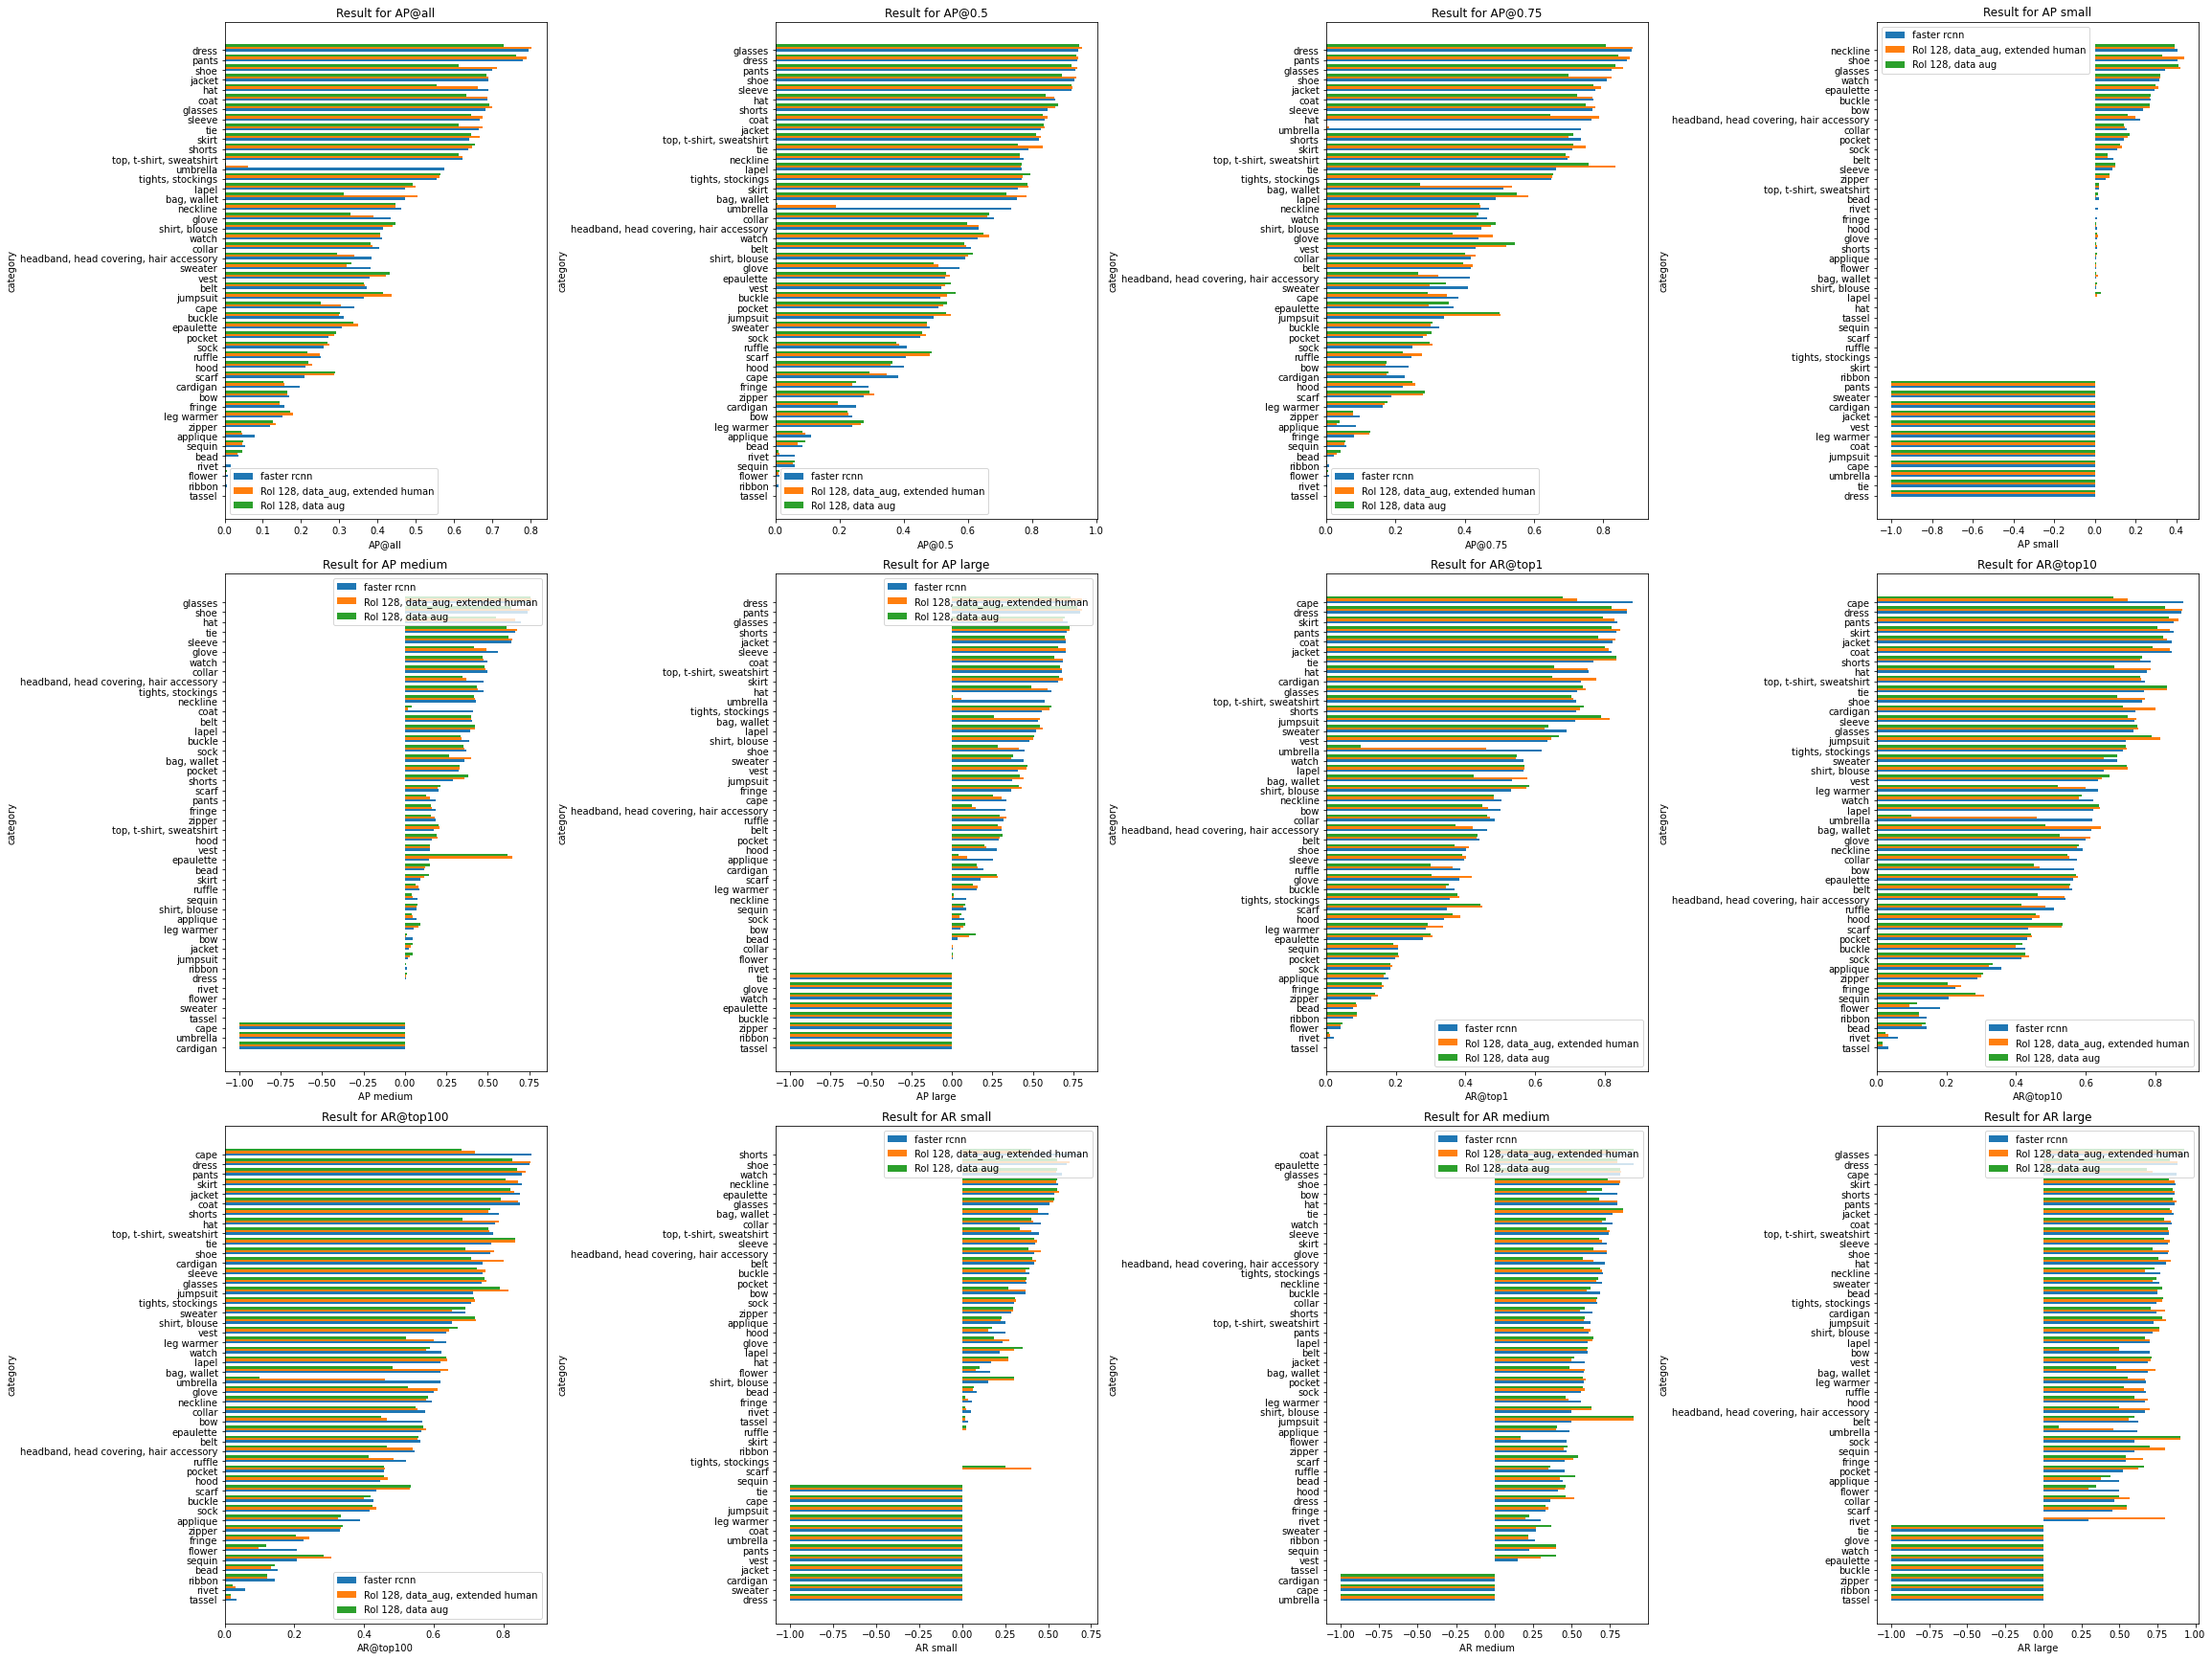

In [13]:
draw_chart_mul_h_sorted(names, stats_batch, metrics,figure_name='ap_figure/all.jpg')

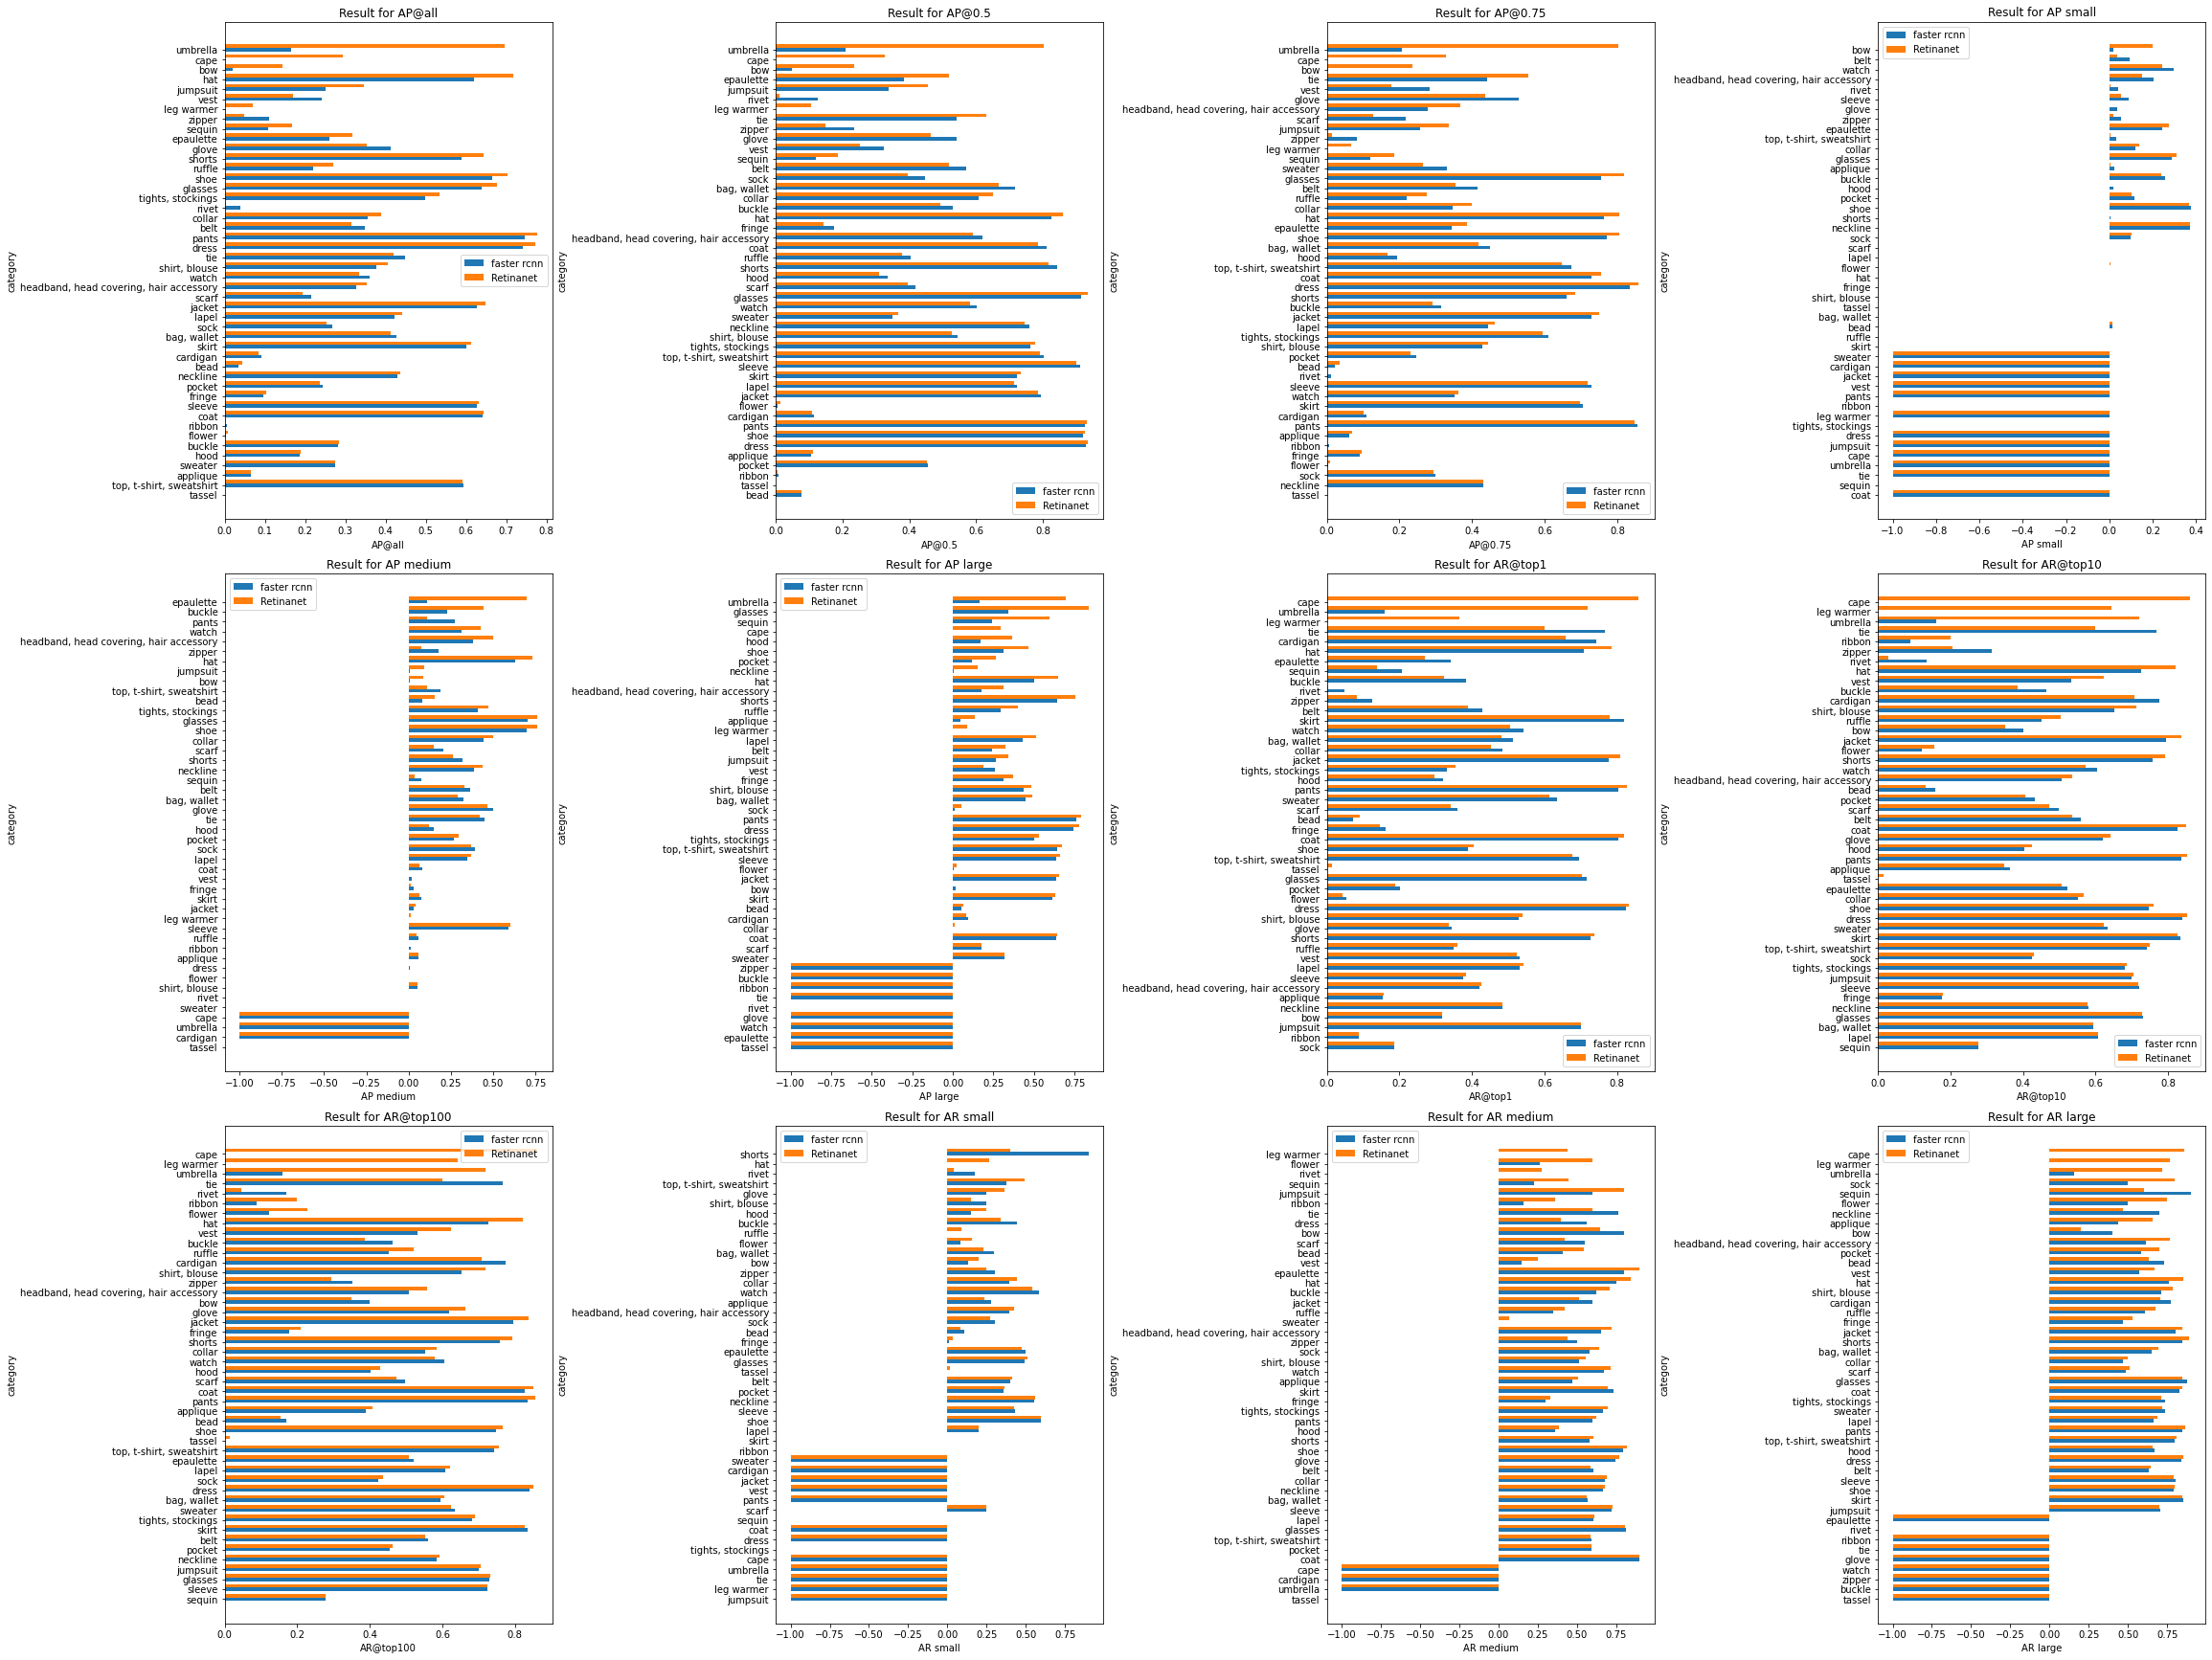

In [30]:
draw_chart_mul_h_sorted_by_difference(names, stats_batch,0,1, metrics,figure_name='ap_figure/all_sort_retinanet_frcnn.jpg')

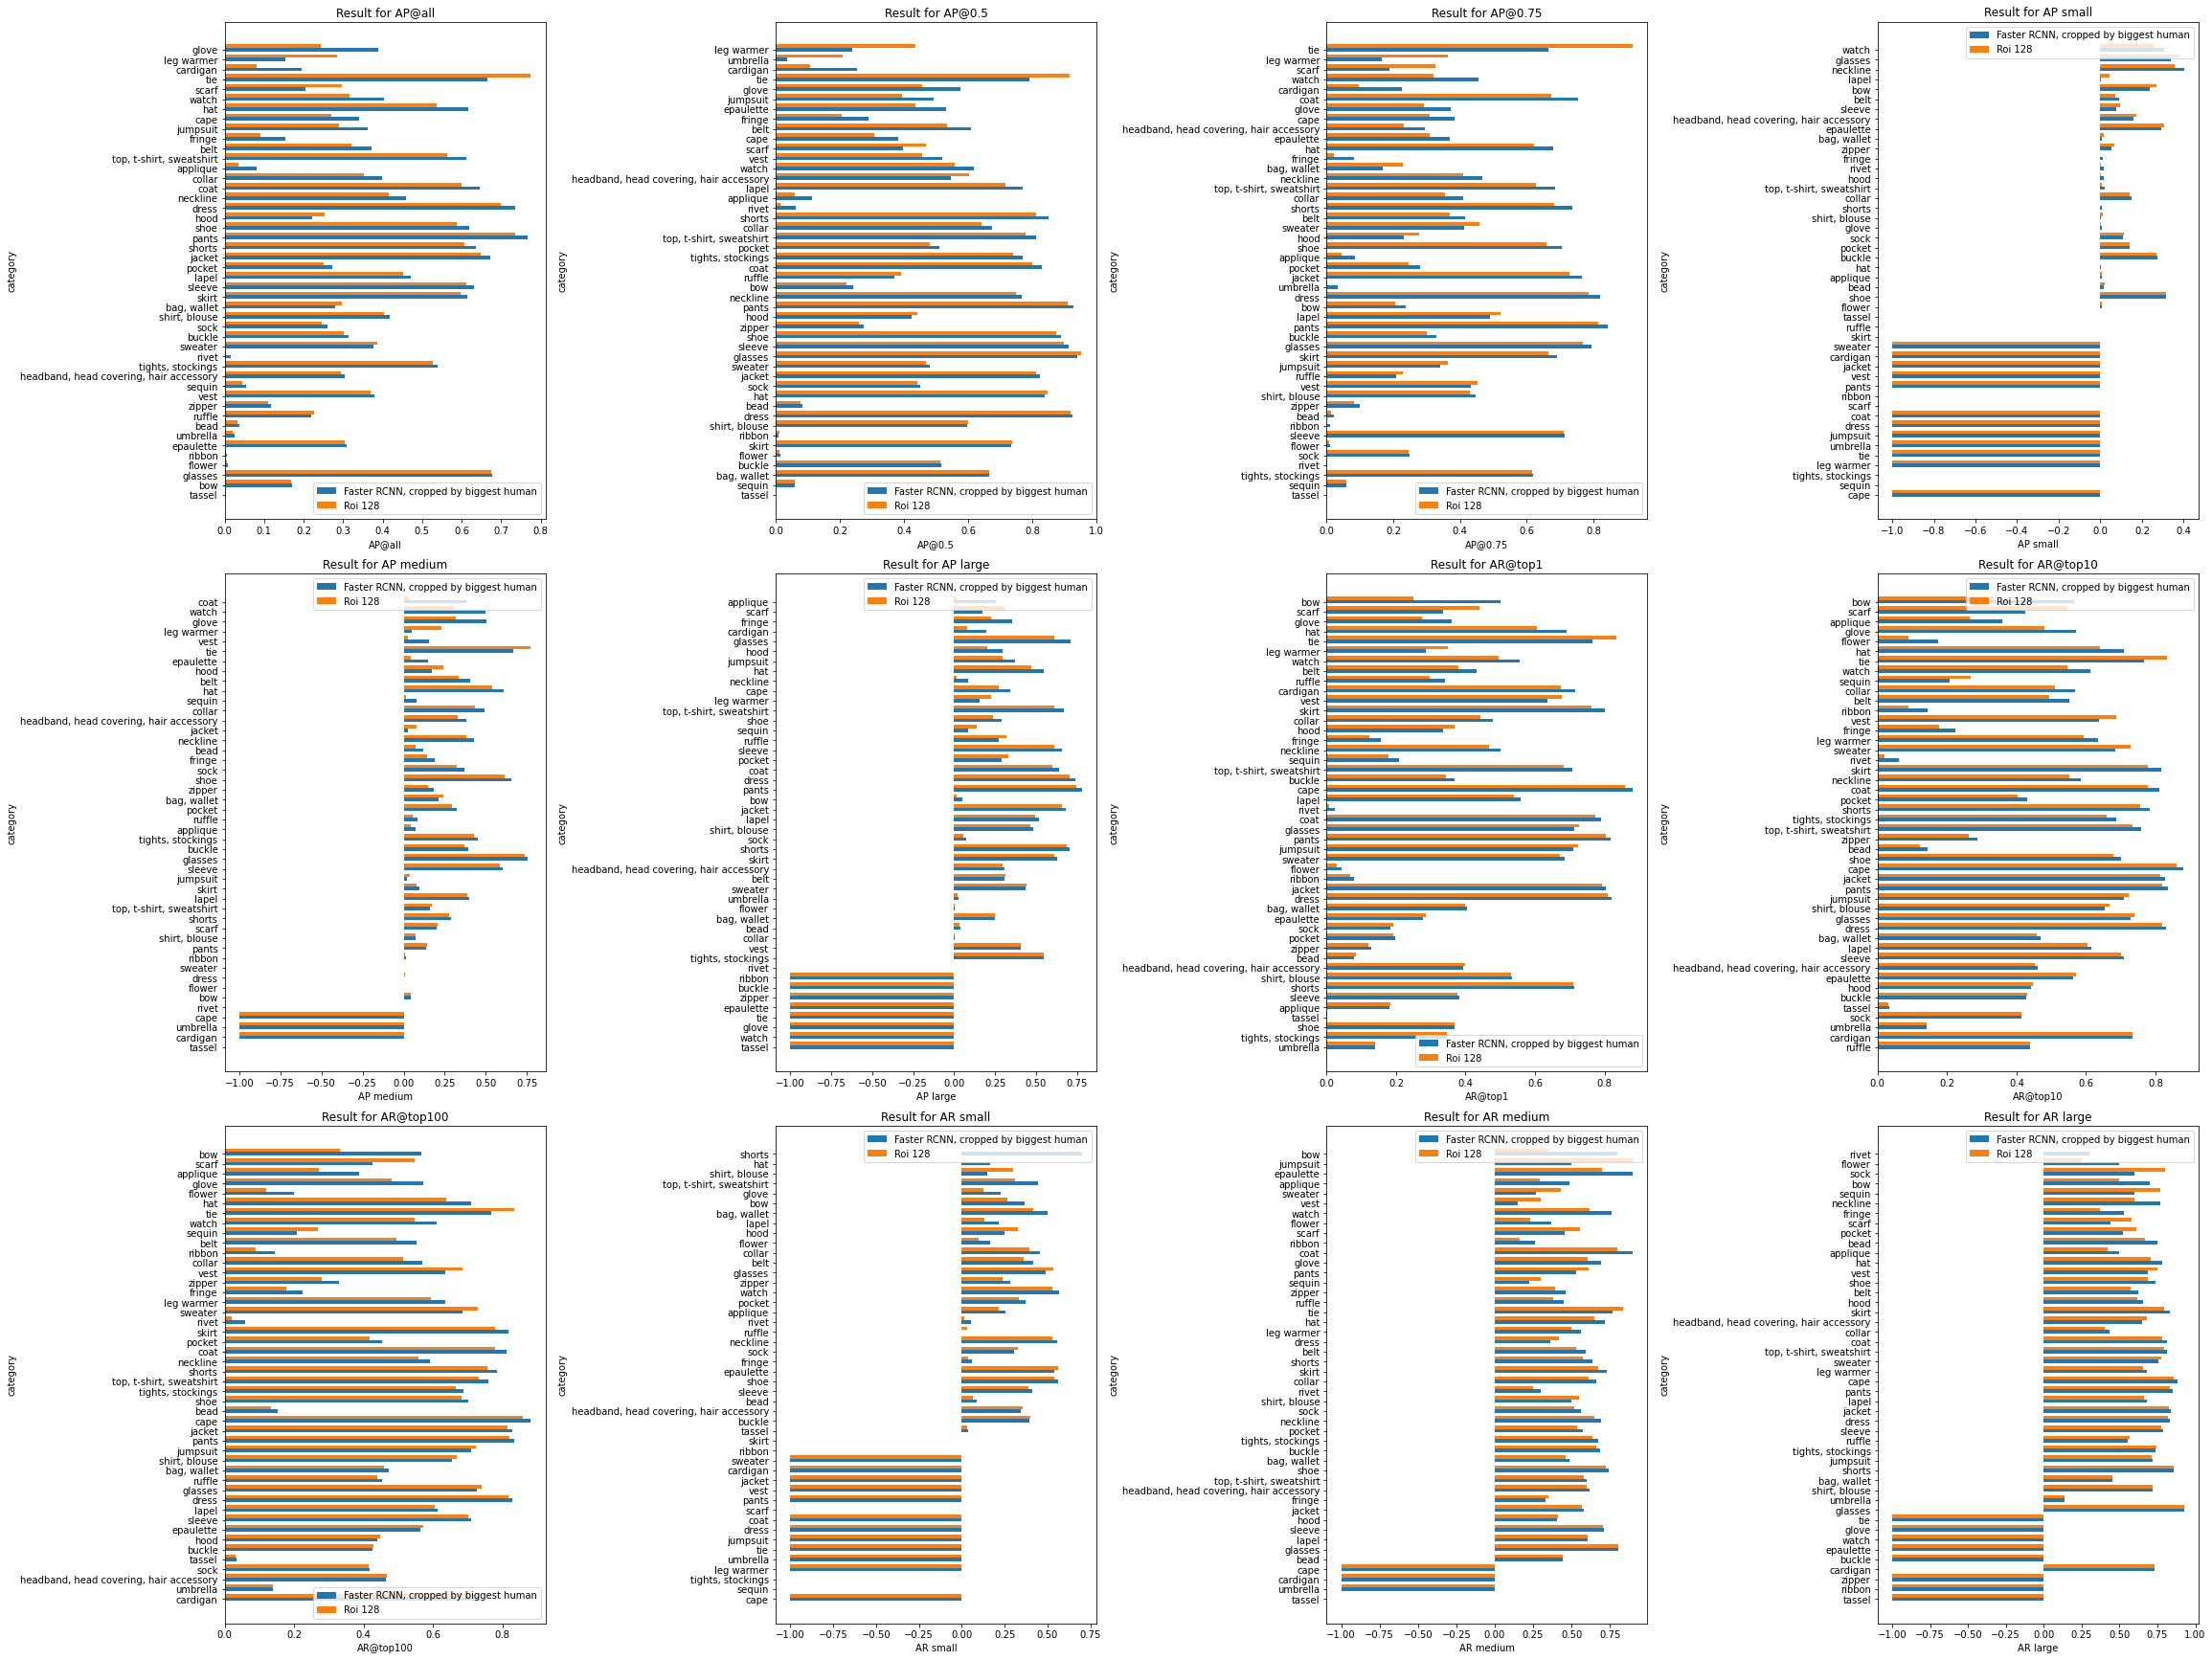

In [10]:
draw_chart_mul_h_sorted_by_difference(names, stats_batch,0,1, metrics,figure_name='ap_figure/all_sort_frcnn_roi.jpg')

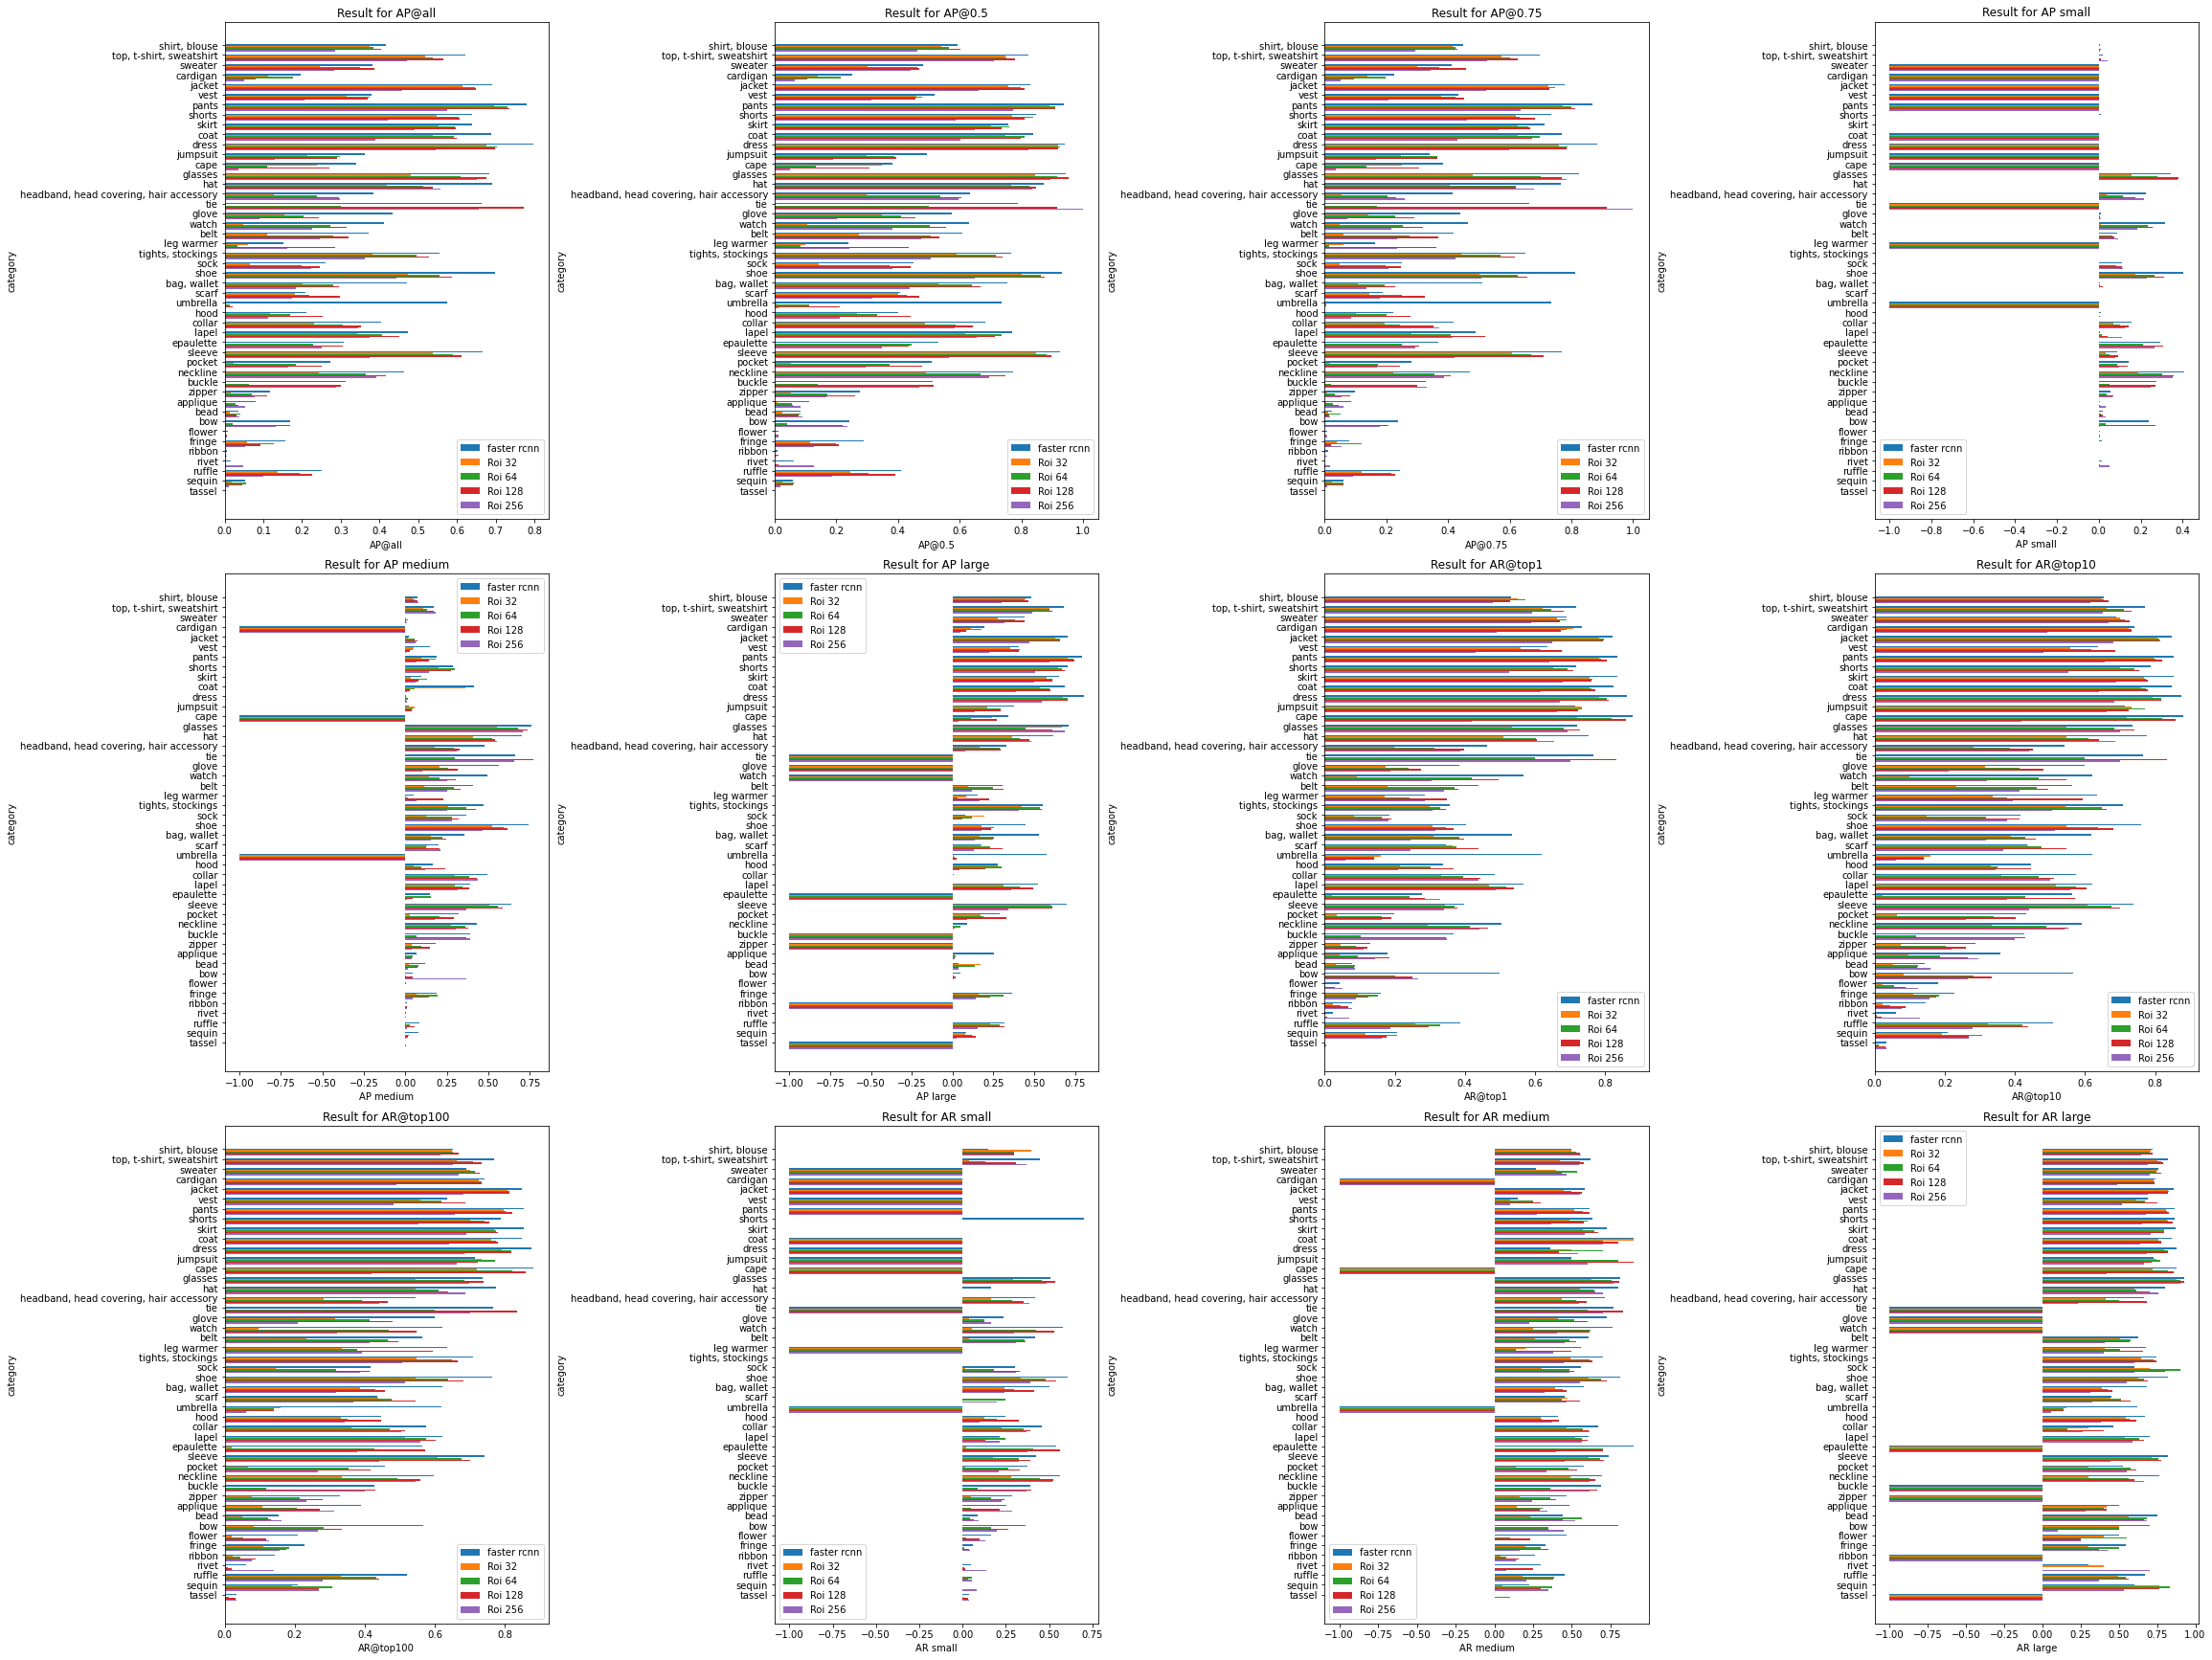

In [17]:
draw_chart_mul_h(names, stats_batch, metrics,figure_name='ap_figure/all.jpg')

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def draw_chart(names, stats, metrics,figure_name=None):
    row_num = 3
    col_num = 4
    fig, plots = plt.subplots(nrows=row_num, ncols=col_num, figsize=(32, 24))
    colors = plt.rcParams["axes.prop_cycle"]()
    
    count = 0
    x_range = np.arange(len(names))

    for i, row in enumerate(plots):
        for j, ax in enumerate(row):
            metric = metrics[count]
            stat = stats[count]
            ax.set_xlabel('category')
            ax.set_ylabel(metric)
            #c = next(colors)["color"]
            ax.bar(x_range, stat,)
            ax.set_title('Result for {}'.format(metric))
            ax.set_xticks(x_range)
            ax.set_xticklabels(names, rotation=90)                
            count += 1
            #if count >= col_num:
            #    j += 1
            #    while j < len(row):
            #        row[j].axis('off')
            #        j+=1

            #    break
    fig.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
    #plt.show()
    if figure_name is not None:
        plt.savefig(figure_name,dpi=300)
    


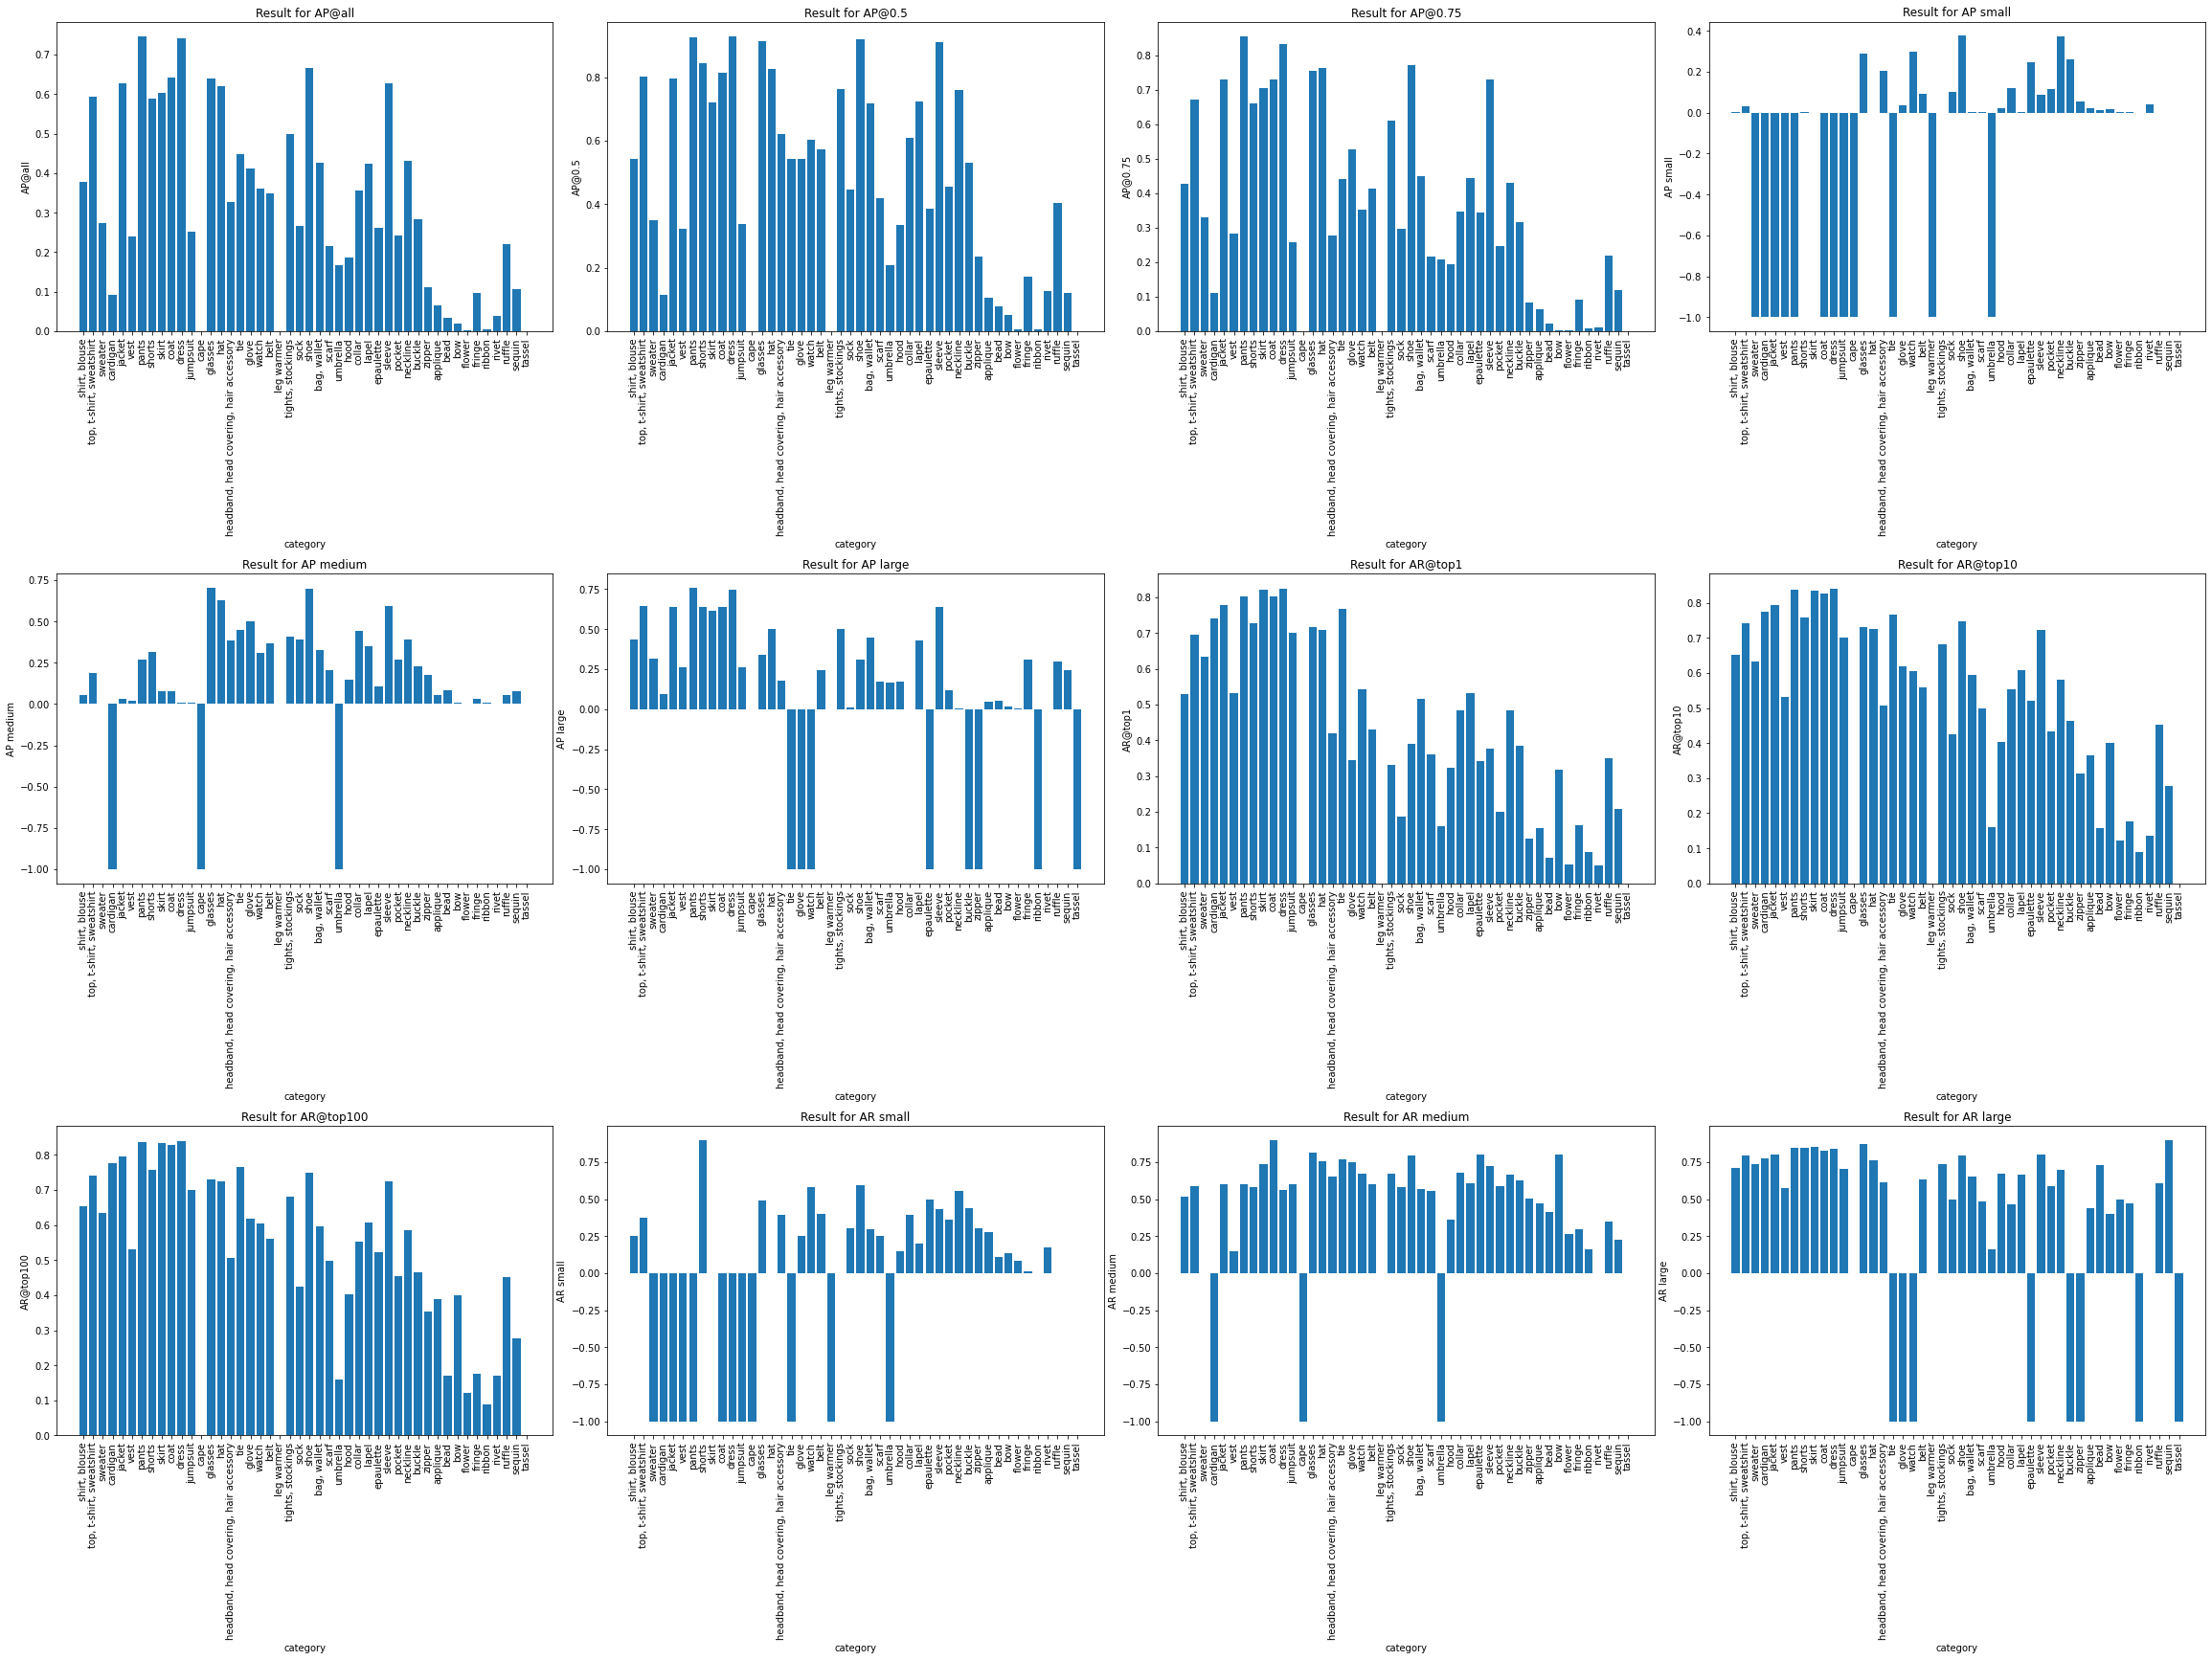

In [14]:
file_name=os.path.basename(res_file)
file_name = os.path.splitext(file_name)[0]
out_path='ap_figure/{}.jpg'.format(file_name)
draw_chart(names, stats, metrics, out_path)

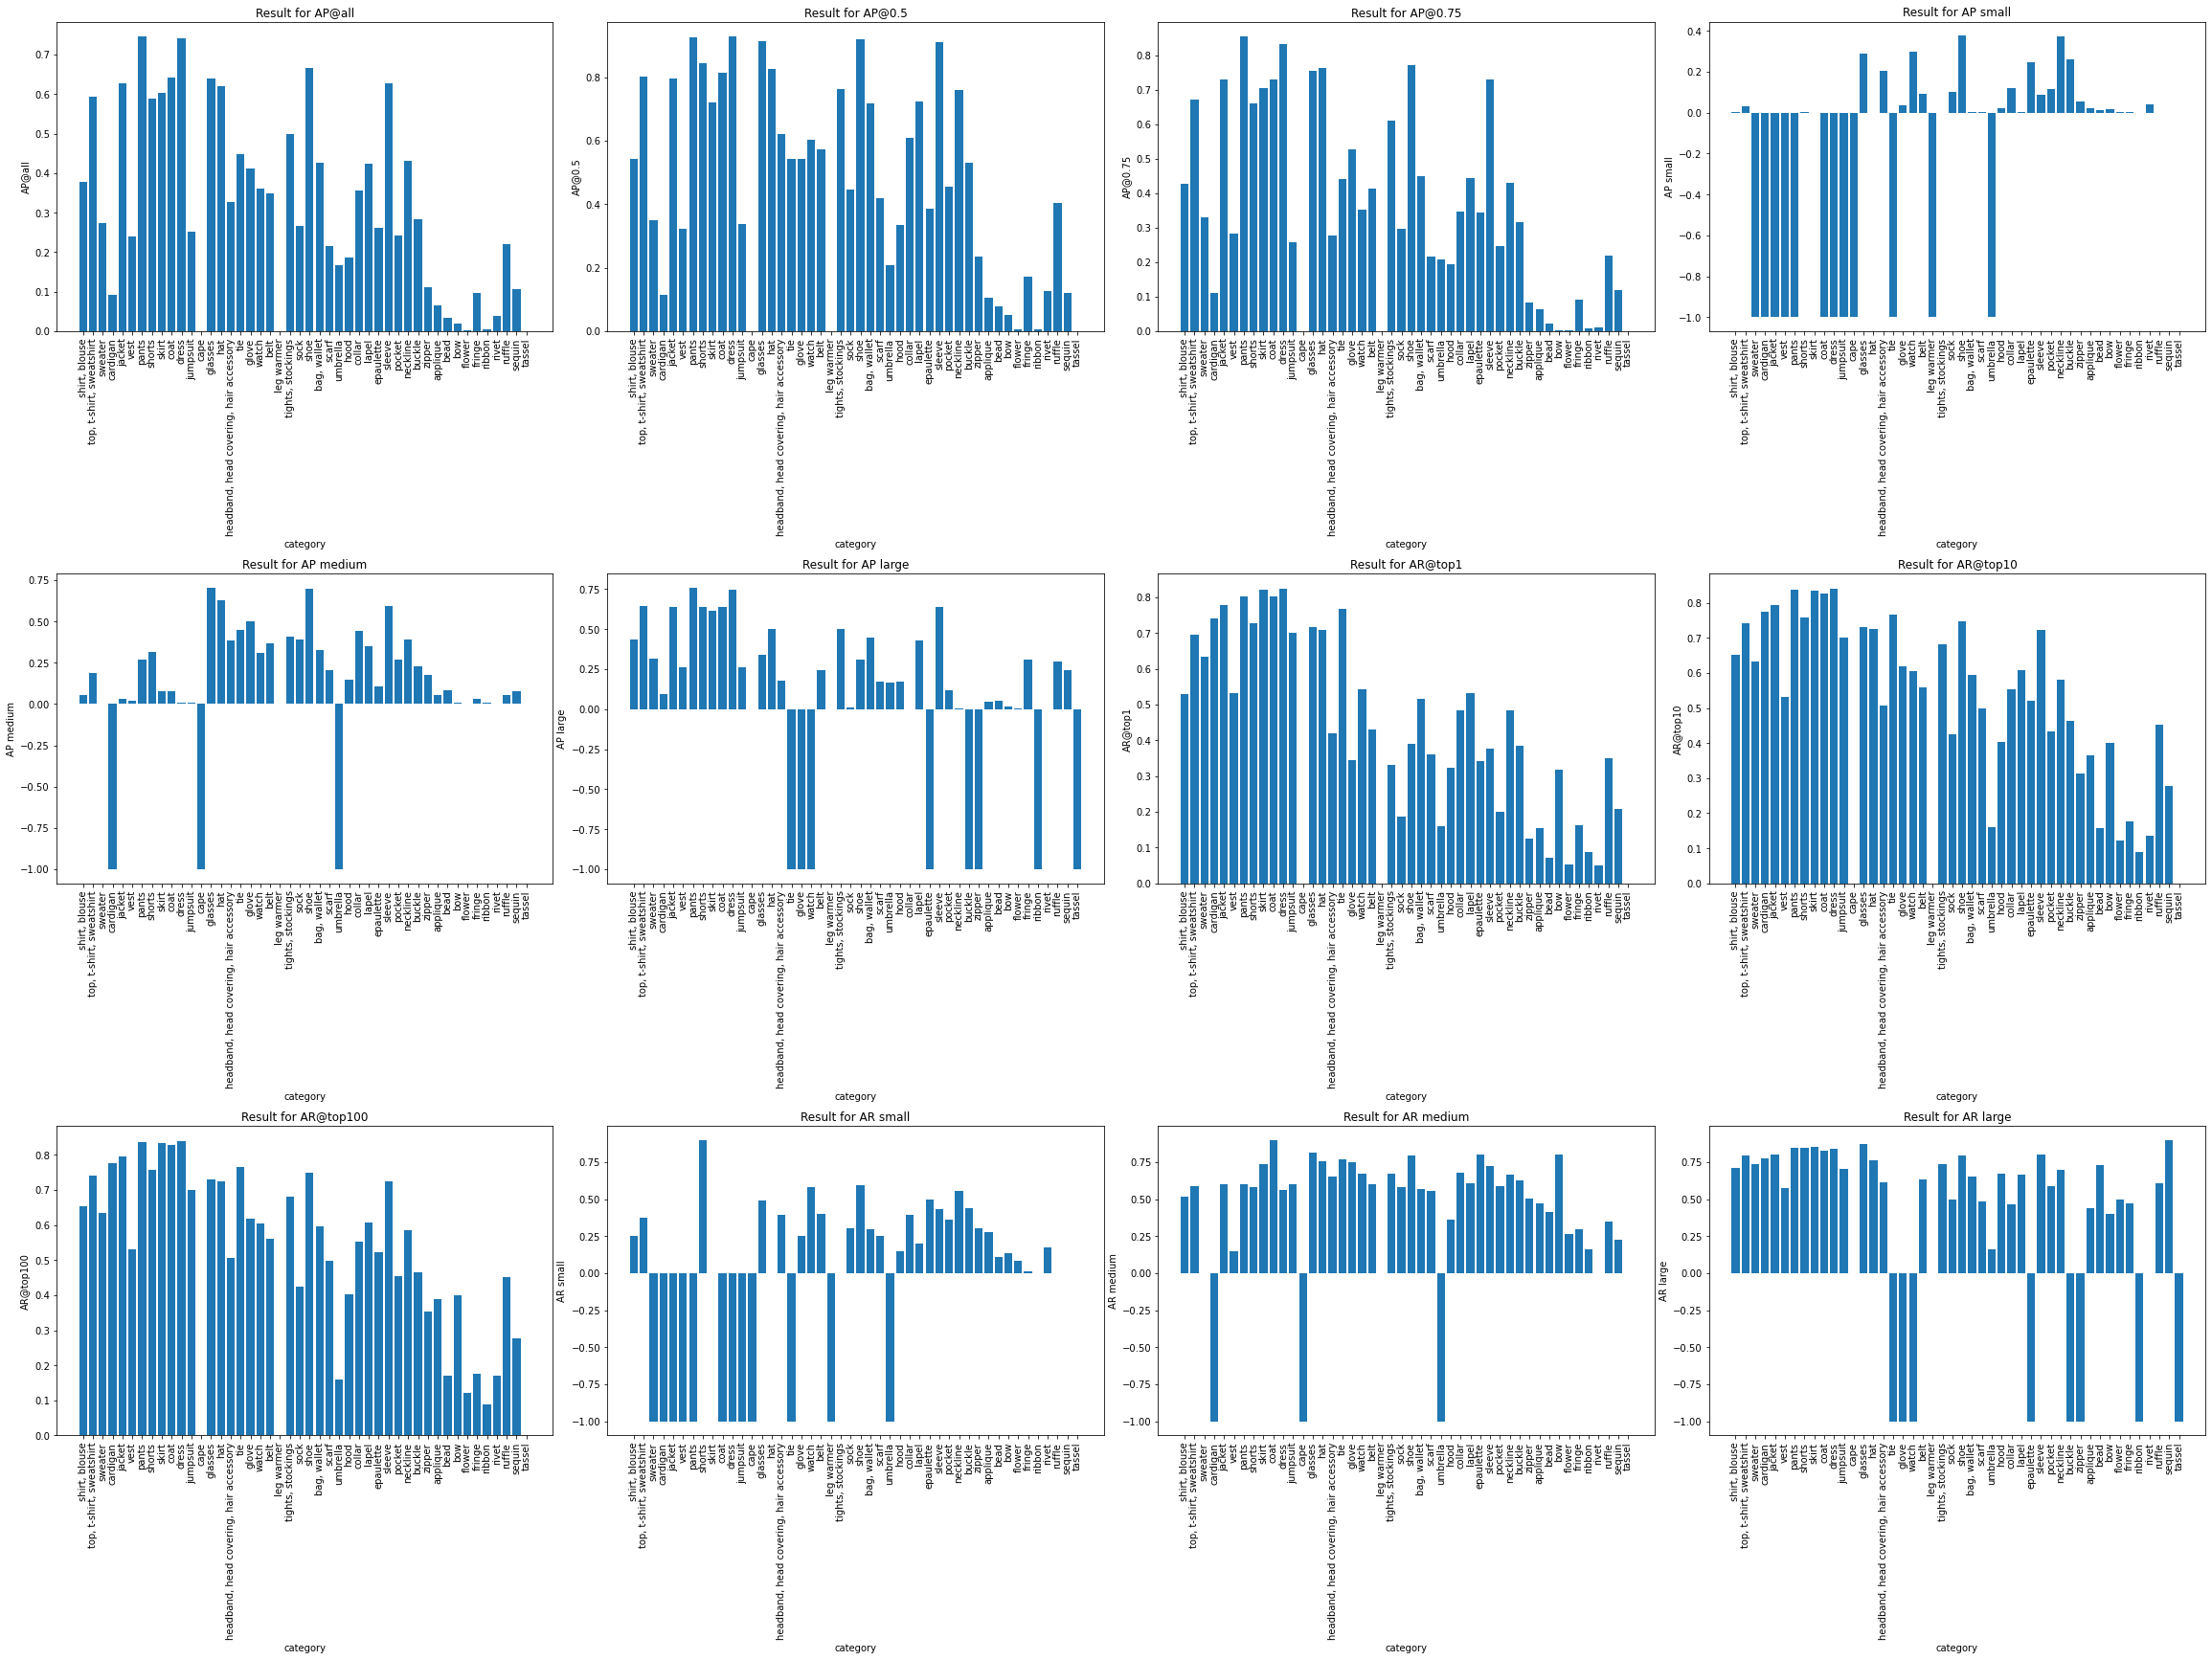

In [10]:
draw_chart(names, stats, metrics)

In [35]:
cocoEval.summarize_per_category()
cocoEval.summarize()


 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.276
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.424
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.309
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.147
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.306
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.298
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.372
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.455
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.457
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.222
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.458
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.546


In [24]:
cocoEval.params.outDir = './analyze_figures'
cocoEval.analyze(save_to_dir='./analyze_figures/')

evaluation DONE (t=0.25s).
Accumulating evaluation results...
Accumulating DONE (t=0.01s).
Running per image evaluation...
Evaluate annotation type *bbox*
Per image evaluation DONE (t=0.51s).
Accumulating evaluation results...
Accumulating DONE (t=0.01s).
save figure to ./analyze_figures//legs and feet-leg warmer-all.pdf
save figure to ./analyze_figures//legs and feet-leg warmer-small.pdf
save figure to ./analyze_figures//legs and feet-leg warmer-medium.pdf
save figure to ./analyze_figures//legs and feet-leg warmer-large.pdf
Analyzing DONE (t=0.78s).
Analyzing legs and feet-tights, stockings (21):
Running per image evaluation...
Evaluate annotation type *bbox*
Per image evaluation DONE (t=0.52s).
Accumulating evaluation results...
Accumulating DONE (t=0.01s).
Running per image evaluation...
Evaluate annotation type *bbox*
Per image evaluation DONE (t=0.46s).
Accumulating evaluation results...
Accumulating DONE (t=0.02s).
save figure to ./analyze_figures//legs and feet-tights, stockings

In [18]:
# print out results
fp_eval.print() # print out result using both Iou AND F1 constraint

results with both IoU and F1 thresholds
 Average Precision  (AP) @[ IoU=0.50:0.95 | F1=0.50:0.95 |area=all | maxDets=100 | superCat=outerwear] = 1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | F1=0.50:0.95 |area=all | maxDets=100 | superCat=     part] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | F1=0.50:0.95 |area=all | maxDets=100 | superCat=      all] = 0.590
 Average Precision  (AP) @[ IoU=0.50      | F1=0.50:0.95 |area=all | maxDets=100 | superCat=      all] = 0.590
 Average Precision  (AP) @[ IoU=0.75      | F1=0.50:0.95 |area=all | maxDets=100 | superCat=      all] = 0.590
 Average Precision  (AP) @[ IoU=0.50:0.95 | F1=0.50      |area=all | maxDets=100 | superCat=      all] = 0.532
 Average Precision  (AP) @[ IoU=0.50:0.95 | F1=0.75      |area=all | maxDets=100 | superCat=      all] = 0.532
 Average Precision  (AP) @[ IoU=0.50      | F1=0.50      |area=all | maxDets=100 | superCat=      all] = 0.532
 Average Precision  (AP) @[ IoU=0.50      | F1=0.75      |area=all | max

In [6]:
# print out result using IoU only, 
# here results should be the same as what coco API produces
fp_eval.print(f1=False)

results with IoU thresholds (f1_threshold = -1.0)
 Average Precision  (AP) @[ IoU=0.50:0.95 | F1=none      |area=all | maxDets=100 | superCat=outerwear] = 1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | F1=none      |area=all | maxDets=100 | superCat=accessory] = 0.626
 Average Precision  (AP) @[ IoU=0.50:0.95 | F1=none      |area=all | maxDets=100 | superCat=     part] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | F1=none      |area=all | maxDets=100 | superCat=      all] = 0.532
 Average Precision  (AP) @[ IoU=0.50      | F1=none      |area=all | maxDets=100 | superCat=      all] = 0.532
 Average Precision  (AP) @[ IoU=0.75      | F1=none      |area=all | maxDets=100 | superCat=      all] = 0.532
 Average Precision  (AP) @[ IoU=0.50:0.95 | F1=none      |area=  s | maxDets=100 | superCat=      all] = 0.505
 Average Precision  (AP) @[ IoU=0.50:0.95 | F1=none      |area=  m | maxDets=100 | superCat=      all] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | F1=none      |area

In [7]:
fp_eval.print(iou=False) # print out result using f1 only

results with F1 thresholds (iou_threshold = -1.0)
 Average Precision  (AP) @[ IoU=none      | F1=0.50:0.95 |area=all | maxDets=100 | superCat=outerwear] = 1.000
 Average Precision  (AP) @[ IoU=none      | F1=0.50:0.95 |area=all | maxDets=100 | superCat=     part] = 0.240
 Average Precision  (AP) @[ IoU=none      | F1=0.50:0.95 |area=all | maxDets=100 | superCat=      all] = 0.699
 Average Precision  (AP) @[ IoU=none      | F1=0.50      |area=all | maxDets=100 | superCat=      all] = 0.688
 Average Precision  (AP) @[ IoU=none      | F1=0.75      |area=all | maxDets=100 | superCat=      all] = 0.688
 Average Precision  (AP) @[ IoU=none      | F1=0.50:0.95 |area=  s | maxDets=100 | superCat=      all] = 1.000
 Average Precision  (AP) @[ IoU=none      | F1=0.50:0.95 |area=  m | maxDets=100 | superCat=      all] = 0.476
 Average Precision  (AP) @[ IoU=none      | F1=0.50:0.95 |area=  l | maxDets=100 | superCat=      all] = 0.756
 Average Recall     (AR) @[ IoU=none      | F1=0.50:0.95 |area

### [Optional] Get per-class and/or per-superclass results

In [8]:
fp_eval.summarize_class(perSuperClass=False, perCls=True)

In [9]:
# check out results for individual class
class_name = 'shirt, blouse'

fp_eval.print_class_result(class_name, f1=True, iou=True)
fp_eval.print_class_result(class_name, f1=False, iou=True)
fp_eval.print_class_result(class_name, f1=True, iou=False)

shirt, blouse results with both IoU and F1 thresholds
 Average Precision  (AP) @[ IoU=0.50:0.95 | F1=0.50:0.95 |area=all | maxDets=100 ] = 1.000
 Average Precision  (AP) @[ IoU=0.50      | F1=0.50:0.95 |area=all | maxDets=100 ] = 1.000
 Average Precision  (AP) @[ IoU=0.75      | F1=0.50:0.95 |area=all | maxDets=100 ] = 1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | F1=0.50      |area=all | maxDets=100 ] = 1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | F1=0.75      |area=all | maxDets=100 ] = 1.000
 Average Precision  (AP) @[ IoU=0.50      | F1=0.50      |area=all | maxDets=100 ] = 1.000
 Average Precision  (AP) @[ IoU=0.50      | F1=0.75      |area=all | maxDets=100 ] = 1.000
 Average Precision  (AP) @[ IoU=0.75      | F1=0.50      |area=all | maxDets=100 ] = 1.000
 Average Precision  (AP) @[ IoU=0.75      | F1=0.75      |area=all | maxDets=100 ] = 1.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | F1=0.50:0.95 |area=  s | maxDets=100 ] = -1.000
 Average Precision  (AP) @[ IoU=0.5

### Sanity check with COCO API
COCO get detection result only, equivalent to $AP_{IoU}$ in Fashionpedia

In [10]:
cocoGt=COCO(anno_file)
cocoDt=cocoGt.loadRes(res_file)
imgIds=sorted(cocoGt.getImgIds())

cocoEval = COCOeval(cocoGt,cocoDt,annType)
cocoEval.params.imgIds  = imgIds
cocoEval.evaluate()
cocoEval.accumulate()
cocoEval.summarize()

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *segm*
DONE (t=0.02s).
Accumulating evaluation results...
DONE (t=0.08s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.532
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.532
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.532
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.505
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.800
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.500
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.562
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets